# Correlation between US Dollar Index, The Treasury Market, Gold, and Bitcoin
------------------------------

## UM FinTech Bootcamp 2021
### April 20th, 2021
### Completed by:
- Sheldon Palm
- William Tate Jones
- Jonathan Eidam

#### Import Libraries and Dependencies

In [42]:
import pandas as pd
import numpy as np
import datetime as dt
import yfinance as yf
import plotly.graph_objects as go
import plotly.express as px
from pycoingecko import CoinGeckoAPI
cg = CoinGeckoAPI()
%matplotlib inline
import quandl

#### Preparing the USDX dataframe using yfinance

In [43]:
# Assigning the US Dollar Index ticker to a variable
usdx = yf.Ticker('DX-Y.NYB')
usdx

yfinance.Ticker object <DX-Y.NYB>

In [44]:
# Reading in the OHLC data for a given period
usdx_historical = usdx.history(start='2020-09-16', end='2021-04-16', interval='1d')
usdx_historical

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2020-09-16,93.080002,93.279999,92.779999,93.209999,0,0,0
2020-09-17,93.150002,93.589996,92.870003,92.970001,0,0,0
2020-09-18,92.860001,93.010002,92.769997,92.930000,0,0,0
2020-09-21,93.010002,93.779999,92.750000,93.540001,0,0,0
2020-09-22,93.550003,94.080002,93.470001,93.989998,0,0,0
...,...,...,...,...,...,...,...
2021-04-12,92.180000,92.330002,92.010002,92.139999,0,0,0
2021-04-13,92.080002,92.330002,91.790001,91.849998,0,0,0
2021-04-14,91.830002,91.830002,91.570000,91.690002,0,0,0


In [45]:
# Slicing the dataframe for the Closing Prices only 
usdx_historical_close = usdx_historical[['Close']]
usdx_historical_close

,Close
Date,
2020-09-16,93.209999
2020-09-17,92.970001
2020-09-18,92.930000
2020-09-21,93.540001
2020-09-22,93.989998
...,...
2021-04-12,92.139999
2021-04-13,91.849998
2021-04-14,91.690002


In [46]:
# Renaming the dataframe to reflect only the Closing Prices
usdx = usdx_historical_close.rename(columns={'Close': 'USDX Close'})
usdx

,USDX Close
Date,
2020-09-16,93.209999
2020-09-17,92.970001
2020-09-18,92.930000
2020-09-21,93.540001
2020-09-22,93.989998
...,...
2021-04-12,92.139999
2021-04-13,91.849998
2021-04-14,91.690002


#### Preparing the 30 Year US Treasury Bond dataframe using yfinance

In [47]:
# Assigning the 30 Year US Treasury Bond ticker to a variable
us_tbond_30yr_june = yf.Ticker('ZBM21.CBT')
us_tbond_30yr_june

yfinance.Ticker object <ZBM21.CBT>

In [48]:
# Reading in the OHLC data for a given period
us_tbond_30yr_june_historical = us_tbond_30yr_june.history(start='2020-09-16', end='2021-04-16', interval='1d')
us_tbond_30yr_june_historical

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2020-09-16,177.750000,177.750000,177.750000,177.750000,0,0,0
2020-09-17,178.000000,178.000000,178.000000,178.000000,0,0,0
2020-09-18,177.531006,177.531006,177.531006,177.531006,0,0,0
2020-09-21,178.093994,178.093994,178.093994,178.093994,0,0,0
2020-09-22,178.281006,178.281006,178.281006,178.281006,0,0,0
...,...,...,...,...,...,...,...
2021-04-12,156.561996,156.968994,156.156006,156.281006,274365,0,0
2021-04-13,156.468994,157.343994,155.781006,157.156006,440160,0,0
2021-04-14,157.311996,157.438004,156.656006,156.875000,286963,0,0


In [49]:
# Slicing the dataframe for the Closing Prices only
us_tbond_30yr_june_historical_close = us_tbond_30yr_june_historical[['Close']]
us_tbond_30yr_june_historical_close

,Close
Date,
2020-09-16,177.750000
2020-09-17,178.000000
2020-09-18,177.531006
2020-09-21,178.093994
2020-09-22,178.281006
...,...
2021-04-12,156.281006
2021-04-13,157.156006
2021-04-14,156.875000


In [50]:
# Renaming the dataframe to reflect only the Closing Prices
us_tbond_30yr_june = us_tbond_30yr_june_historical_close.rename(columns={'Close': 'US 30yr T-Bond Close (JUNE)'})
us_tbond_30yr_june

,US 30yr T-Bond Close (JUNE)
Date,
2020-09-16,177.750000
2020-09-17,178.000000
2020-09-18,177.531006
2020-09-21,178.093994
2020-09-22,178.281006
...,...
2021-04-12,156.281006
2021-04-13,157.156006
2021-04-14,156.875000


#### Preparing the 10 Year US Treasury Note dataframe using yfinance

In [51]:
# Assigning the 10 Year US Treasury Note ticker to a variable
us_tnote_10yr_june = yf.Ticker('ZNM21.CBT')
us_tnote_10yr_june

yfinance.Ticker object <ZNM21.CBT>

In [52]:
# Reading in the OHLC data for a given period
us_tnote_10yr_june_historical = us_tnote_10yr_june.history(start='2020-09-16', end='2021-04-16', interval='1d')
us_tnote_10yr_june_historical

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2020-09-16,139.453003,139.453003,139.453003,139.453003,0,0,0
2020-09-17,139.453003,139.453003,139.453003,139.453003,0,0,0
2020-09-18,139.406006,139.406006,139.406006,139.406006,0,0,0
2020-09-21,139.561996,139.561996,139.561996,139.561996,0,0,0
2020-09-22,139.625000,139.625000,139.625000,139.625000,0,0,0
...,...,...,...,...,...,...,...
2021-04-12,131.733994,131.891006,131.531006,131.625000,1179342,0,0
2021-04-13,131.703003,132.125000,131.375000,132.078003,1747605,0,0
2021-04-14,132.108994,132.188004,131.781006,131.921997,1339839,0,0


In [53]:
# Slicing the dataframe for the Closing Prices only
us_tnote_10yr_june_historical_close = us_tnote_10yr_june_historical[['Close']]
us_tnote_10yr_june_historical_close

,Close
Date,
2020-09-16,139.453003
2020-09-17,139.453003
2020-09-18,139.406006
2020-09-21,139.561996
2020-09-22,139.625000
...,...
2021-04-12,131.625000
2021-04-13,132.078003
2021-04-14,131.921997


In [54]:
# Renaming the dataframe to reflect only the Closing Prices
us_tnote_10yr_june = us_tnote_10yr_june_historical_close.rename(columns={'Close': 'US 10yr T-Note Close (JUNE)'})
us_tnote_10yr_june

,US 10yr T-Note Close (JUNE)
Date,
2020-09-16,139.453003
2020-09-17,139.453003
2020-09-18,139.406006
2020-09-21,139.561996
2020-09-22,139.625000
...,...
2021-04-12,131.625000
2021-04-13,132.078003
2021-04-14,131.921997


In [55]:
# Concatenating all three dataframes into one
bonds_vs_usdx = pd.concat([us_tbond_30yr_june, us_tnote_10yr_june, usdx], axis="columns", join="inner")
bonds_vs_usdx = bonds_vs_usdx.reset_index()
bonds_vs_usdx

,Date,US 30yr T-Bond Close (JUNE),US 10yr T-Note Close (JUNE),USDX Close
0,2020-09-16,177.750000,139.453003,93.209999
1,2020-09-17,178.000000,139.453003,92.970001
2,2020-09-18,177.531006,139.406006,92.930000
3,2020-09-21,178.093994,139.561996,93.540001
4,2020-09-22,178.281006,139.625000,93.989998
...,...,...,...,...
140,2021-04-12,156.281006,131.625000,92.139999
141,2021-04-13,157.156006,132.078003,91.849998
142,2021-04-14,156.875000,131.921997,91.690002
143,2021-04-15,159.000000,132.656006,91.669998


#### Plotly Line Graphs

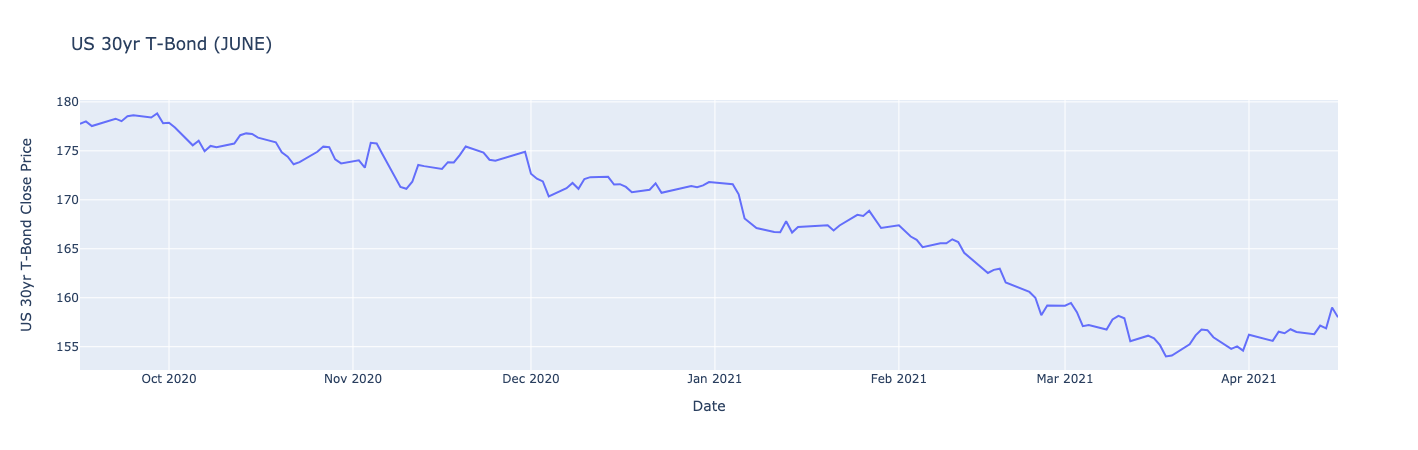

In [56]:
# Plotly Express Line Graph of 30 Year US Treasury Bond
px.line(
    x=bonds_vs_usdx['Date'], 
    y=bonds_vs_usdx['US 30yr T-Bond Close (JUNE)'],
    title='US 30yr T-Bond (JUNE)', 
    labels=dict(x='Date', y='US 30yr T-Bond Close Price'))

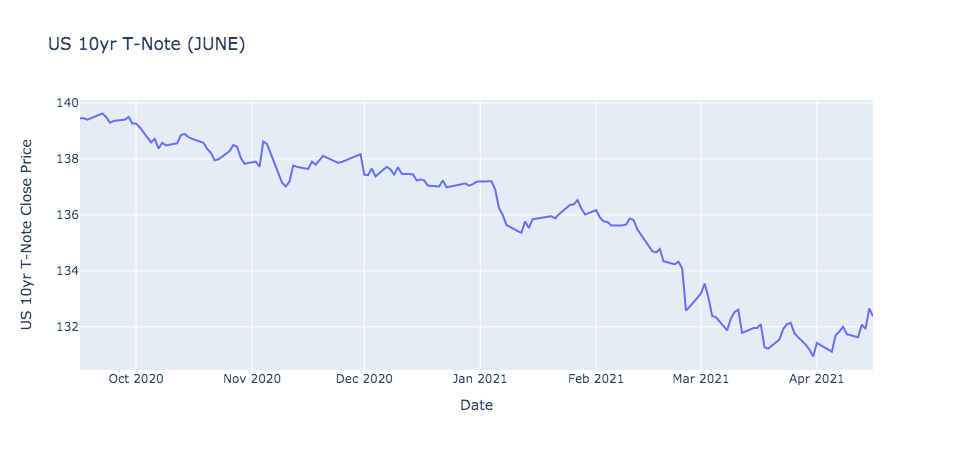

In [57]:
# Plotly Express Line Graph of 10 Year US Treasury Note
px.line(
    x=bonds_vs_usdx['Date'], 
    y=bonds_vs_usdx['US 10yr T-Note Close (JUNE)'], 
    title='US 10yr T-Note (JUNE)', 
    labels=dict(x='Date', y='US 10yr T-Note Close Price'))

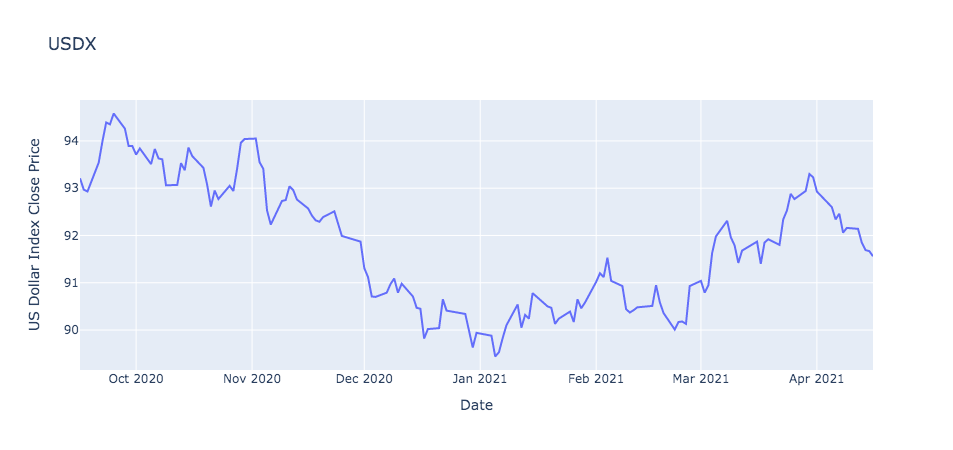

In [58]:
# Plotly Express Line Graph of US Dollar Index
px.line(
    x=bonds_vs_usdx['Date'], 
    y=bonds_vs_usdx['USDX Close'], 
    title='USDX',
    labels=dict(x='Date', y='US Dollar Index Close Price'))

#### Creating a Relative Strength Index Function

In [59]:
# Relative Strength Index Function
def computeRSI (data, time_window):
    diff = data.diff(1).dropna() # diff in one field(one day)
#this preservers dimensions off diff values
    up_chg = 0 * diff
    down_chg = 0 * diff
    
    # up change is equal to the positive difference, otherwise equal to zero
    up_chg[diff > 0] = diff[ diff>0 ]
    
    # down change is equal to negative difference, otherwise equal to zero
    down_chg[diff < 0] = diff[ diff < 0 ]
    
    # check pandas documentation for ewm
    # https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html
    # values are related to exponential decay
    # we set com=time_window-1 so we get decay alpha=1/time_window
    up_chg_avg = up_chg.ewm(com=time_window-1, min_periods=time_window).mean()
    down_chg_avg = down_chg.ewm(com=time_window-1, min_periods=time_window).mean()
    
    rs = abs(up_chg_avg/down_chg_avg)
    rsi = 100 - 100/(1+rs)
    return rsi

In [60]:
#run the function for each column
bonds_vs_usdx['US 30yr T-Bond Close (JUNE)'] = computeRSI(bonds_vs_usdx['US 30yr T-Bond Close (JUNE)'], 14)
bonds_vs_usdx['US 10yr T-Note Close (JUNE)'] = computeRSI(bonds_vs_usdx['US 10yr T-Note Close (JUNE)'], 14)
bonds_vs_usdx['USDX Close'] = computeRSI(bonds_vs_usdx['USDX Close'], 14)
#set the high and low lines (as columns)
bonds_vs_usdx['low'] = 30
bonds_vs_usdx['high'] = 70

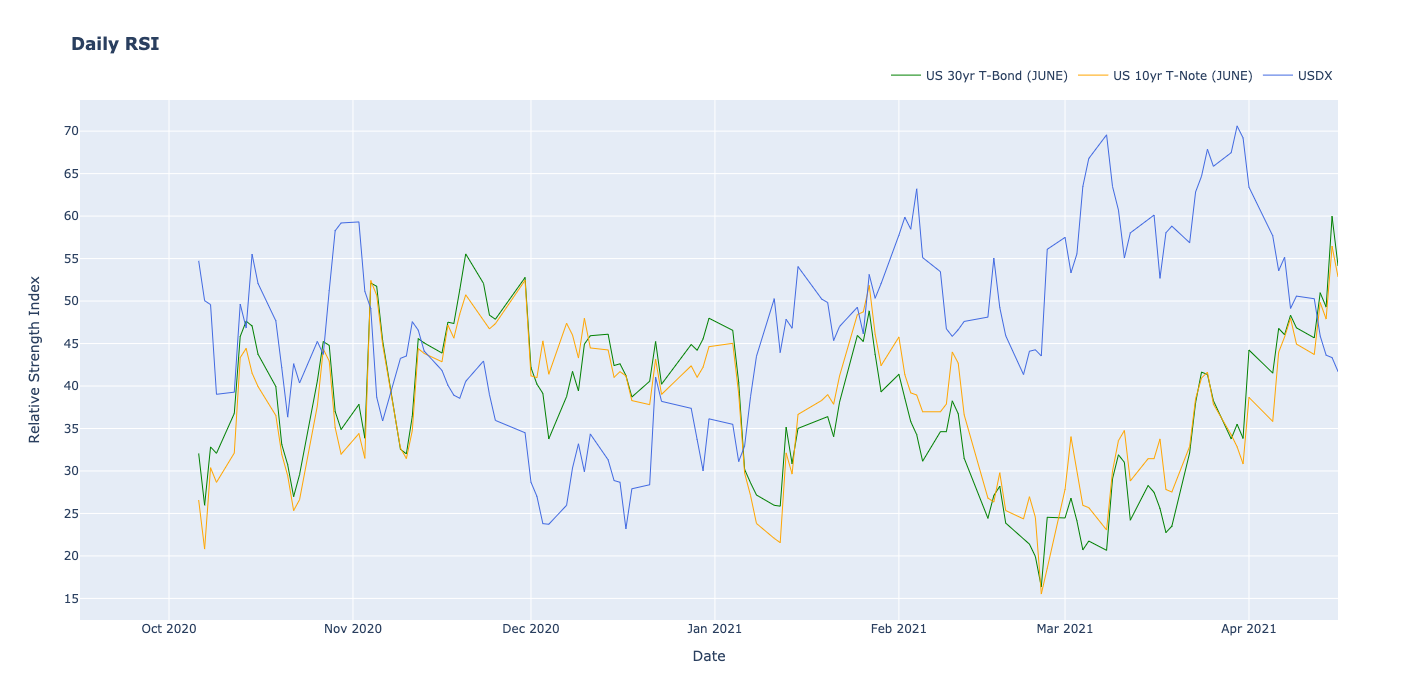

In [61]:
#plot it!
fig = go.Figure()
#create lines/traces
fig.add_trace(go.Scatter(x=bonds_vs_usdx['Date'], y=bonds_vs_usdx['US 30yr T-Bond Close (JUNE)'],
                    mode='lines',
                    name='US 30yr T-Bond (JUNE)',
                    line=dict(color="green", width=1),))
fig.add_trace(go.Scatter(x=bonds_vs_usdx['Date'], y=bonds_vs_usdx['US 10yr T-Note Close (JUNE)'],
                    mode='lines',
                    name='US 10yr T-Note (JUNE)',
                    line=dict(color="orange", width=1),))
fig.add_trace(go.Scatter(x=bonds_vs_usdx['Date'], y=bonds_vs_usdx['USDX Close'],
                    mode='lines',
                    name='USDX',
                    line=dict(color="royalblue", width=1),))

#update axis ticks
fig.update_yaxes(nticks=30,showgrid=True)
fig.update_xaxes(nticks=12,showgrid=True)
#update layout
fig.update_layout(title="<b>Daily RSI</b>"
                 , height = 700
                 , xaxis_title='Date'
                 , yaxis_title='Relative Strength Index'
                 , template = "plotly" #['ggplot2', 'seaborn', 'simple_white', 'plotly', 'plotly_white', 'plotly_dark']
                 )
#update legend
fig.update_layout(legend=dict(
    orientation="h",
    yanchor="bottom",
    y=1.02,
    xanchor="right",
    x=1
))
#show the figure
fig.show()

#### Correlation Table Between 30 Year US Treasury Bond, 10 Year US Treasury Note and the US Dollar Index

In [62]:
#Creating Correlation Table
bonds_vs_usdx_30yr = pd.DataFrame(bonds_vs_usdx['US 30yr T-Bond Close (JUNE)'])
bonds_vs_usdx_10yr= pd.DataFrame(bonds_vs_usdx['US 10yr T-Note Close (JUNE)'])
bonds_vs_usdx_DX = pd.DataFrame(bonds_vs_usdx['USDX Close'])
bonds_vs_usdx_corr = pd.concat([bonds_vs_usdx_DX,bonds_vs_usdx_10yr, bonds_vs_usdx_30yr])
bonds_vs_usdx_corr['USDX Close'] = bonds_vs_usdx['USDX Close']
bonds_vs_usdx_corr['US 10yr T-Note Close (JUNE)'] = bonds_vs_usdx['US 10yr T-Note Close (JUNE)']
bonds_vs_usdx_corr.dropna(inplace=True)
bonds_vs_usdx_corr.corr()


,USDX Close,US 10yr T-Note Close (JUNE),US 30yr T-Bond Close (JUNE)
USDX Close,1.000000,-0.329702,-0.335000
US 10yr T-Note Close (JUNE),-0.329702,1.000000,0.930102
US 30yr T-Bond Close (JUNE),-0.335000,0.930102,1.000000


#### Preparing the Gold dataframe

In [63]:
#importing gold data
gold = pd.read_csv("Gold_Futures_Data.csv")

In [64]:
gold.drop(columns=['Open', 'High','Low','Vol.','Change %'], inplace=True)
gold['Date'] = pd.to_datetime(gold['Date'])
gold.sort_values(by='Date', ascending=True, inplace=True)

In [65]:
gold.set_index(['Date'], inplace=True)
gold.rename(columns={"Price": "Gold Closing Price"}, inplace = True)
gold

,Gold Closing Price
Date,
2013-04-29,1467.4
2013-04-30,1472.2
2013-05-01,1446.3
2013-05-02,1467.7
2013-05-03,1464.3
...,...
2021-04-09,1743.3
2021-04-12,1731.2
2021-04-13,1746.2


#### Preparing the Bitcoin Data

In [66]:
bitcoin_price = cg.get_coin_market_chart_by_id(id='bitcoin', vs_currency='usd', days='max', interval='daily')
btc_price= bitcoin_price['prices']
df_btc = pd.DataFrame(btc_price)
df_btc.columns=['Date', 'Price']
df_btc['Date'] = pd.to_datetime(df_btc['Date'],unit='ms')
df_btc.set_index('Date', inplace=True)
df_btc.index = df_btc.index.normalize()
df_btc.rename(columns={"Price": "BTC Close"}, inplace = True)
df_btc

,BTC Close
Date,
2013-04-28,135.300000
2013-04-29,141.960000
2013-04-30,135.300000
2013-05-01,117.000000
2013-05-02,103.430000
...,...
2021-04-18,60273.866677
2021-04-19,56288.945340
2021-04-20,55721.166053


#### Concatinating the Gold, USDX, and Bitcoin Data

In [67]:
gold_vs_usdx = pd.concat([usdx, gold, df_btc], axis="columns", join="inner")
gold_vs_usdx = gold_vs_usdx.reset_index()
gold_vs_usdx

,Date,USDX Close,Gold Closing Price,BTC Close
0,2020-09-16,93.209999,1970.5,10787.580208
1,2020-09-17,92.970001,1949.9,10952.249969
2,2020-09-18,92.930000,1962.1,10937.996397
3,2020-09-21,93.540001,1910.6,10923.326668
4,2020-09-22,93.989998,1907.6,10439.522489
...,...,...,...,...
139,2021-04-09,92.160004,1743.3,58065.644025
140,2021-04-12,92.139999,1731.2,59988.020959
141,2021-04-13,91.849998,1746.2,59911.020595
142,2021-04-14,91.690002,1734.9,63576.676041


#### Plotting the daily Closes of Bitcoin and Gold

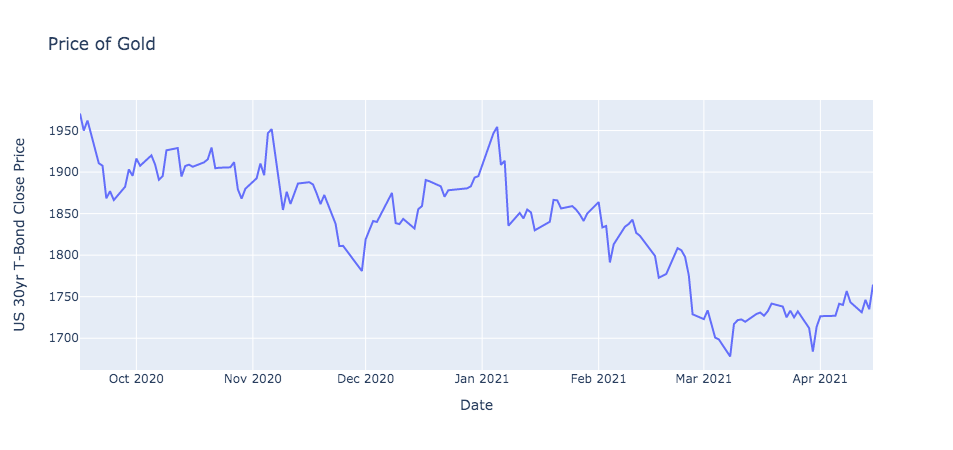

In [68]:
px.line(
    x=gold_vs_usdx['Date'], 
    y=gold_vs_usdx['Gold Closing Price'],
    title='Price of Gold', 
    labels=dict(x='Date', y='US 30yr T-Bond Close Price'))

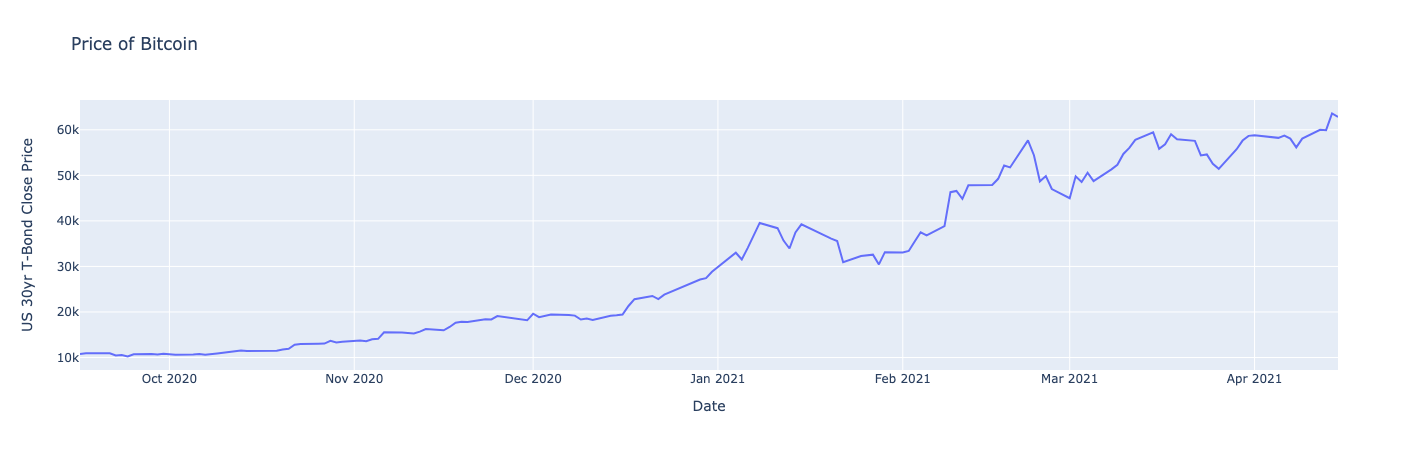

In [69]:
px.line(
    x=gold_vs_usdx['Date'], 
    y=gold_vs_usdx['BTC Close'],
    title='Price of Bitcoin', 
    labels=dict(x='Date', y='US 30yr T-Bond Close Price'))

#### Running Rsi on USDX, Bitcoin, and Gold

In [71]:
gold_vs_usdx['USDX Close'] = computeRSI(gold_vs_usdx['USDX Close'], 14)
gold_vs_usdx['Gold Closing Price'] = computeRSI(gold_vs_usdx['Gold Closing Price'], 14)
gold_vs_usdx['BTC Close'] = computeRSI(gold_vs_usdx['BTC Close'], 14)
gold_vs_usdx['low'] = 30
gold_vs_usdx['high'] = 70
gold_vs_usdx['USDX Close']

0            NaN
1            NaN
2            NaN
3            NaN
4            NaN
         ...    
139    41.529763
140    41.245676
141    37.348739
142    35.486949
143    35.246322
Name: USDX Close, Length: 144, dtype: float64

In [72]:
#### Plotting RSI of above assets

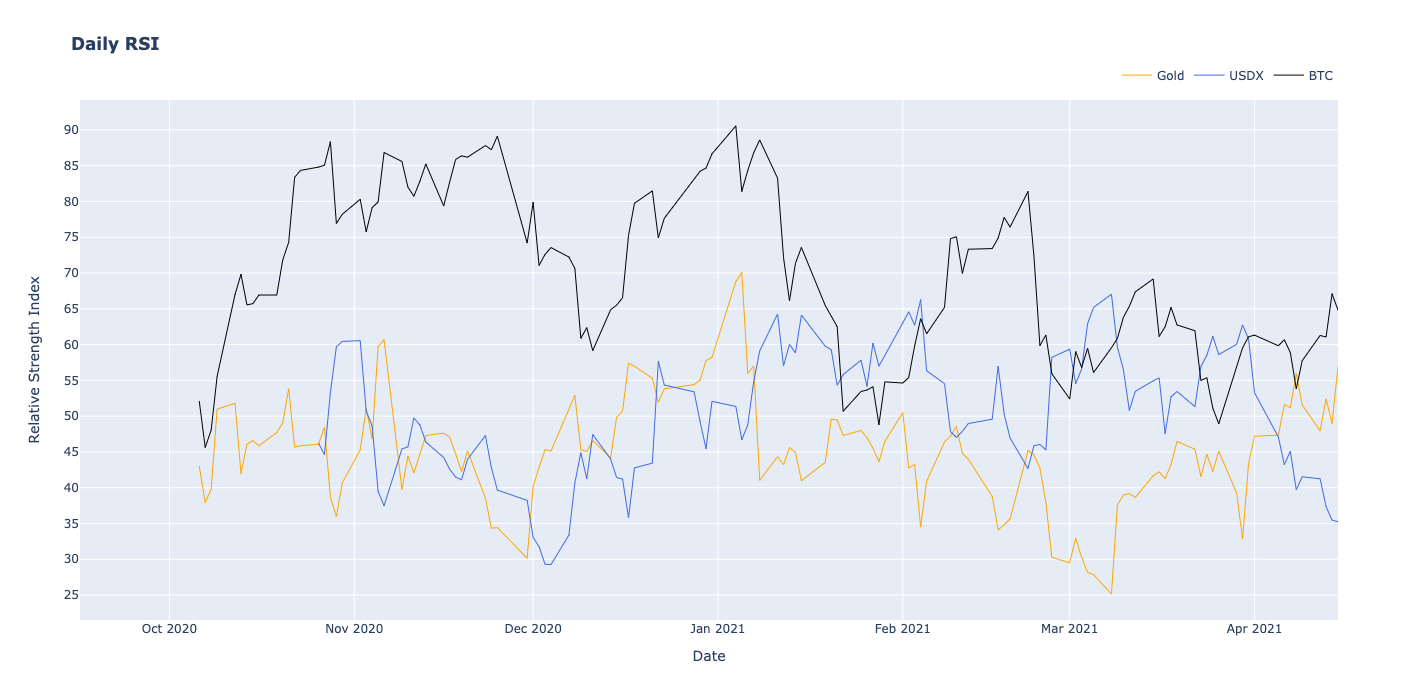

In [73]:
fig_2 = go.Figure()
#create lines/traces
#fig_2.add_trace(go.Scatter(x=gold_vs_spy['Date'], y=gold_vs_spy['SPY Closing Price'],
                    #mode='lines',
                    #name='SP 500',
                    #line=dict(color="Silver", width=1),))
fig_2.add_trace(go.Scatter(x=gold_vs_usdx['Date'], y=gold_vs_usdx['Gold Closing Price'],
                    mode='lines',
                    name='Gold',
                    line=dict(color="orange", width=1),))
fig_2.add_trace(go.Scatter(x=gold_vs_usdx['Date'], y=gold_vs_usdx['USDX Close'],
                    mode='lines',
                    name='USDX',
                    line=dict(color="royalblue", width=1),))
fig_2.add_trace(go.Scatter(x=gold_vs_usdx['Date'], y=gold_vs_usdx['BTC Close'],
                    mode='lines',
                    name='BTC',
                    line=dict(color="black", width=1),))

#update axis ticks
fig_2.update_yaxes(nticks=30,showgrid=True)
fig_2.update_xaxes(nticks=12,showgrid=True)
#update layout
fig_2.update_layout(title="<b>Daily RSI</b>"
                 , height = 700
                 , xaxis_title='Date'
                 , yaxis_title='Relative Strength Index'
                 , template = "plotly" #['ggplot2', 'seaborn', 'simple_white', 'plotly', 'plotly_white', 'plotly_dark']
                 )
#update legend
fig_2.update_layout(legend=dict(
    orientation="h",
    yanchor="bottom",
    y=1.02,
    xanchor="right",
    x=1
))
#show the figure
fig_2.show()

In [74]:
#Creating Correlation Table
usdx_rsi = pd.DataFrame(bonds_vs_usdx['USDX Close'])
gold_rsi = pd.DataFrame(gold_vs_usdx['Gold Closing Price'])
btc_rsi = pd.DataFrame(gold_vs_usdx['BTC Close'])
usdx_gold_corr = pd.concat([usdx_rsi, gold_rsi,btc_rsi])
usdx_gold_corr['USDX Close'] = usdx_rsi['USDX Close']
usdx_gold_corr['BTC Close'] = btc_rsi['BTC Close']
usdx_gold_corr.dropna(inplace=True)
#bonds_vs_usdx_corr.corr()
usdx_gold_corr.corr()

,USDX Close,Gold Closing Price,BTC Close
USDX Close,1.000000,-0.514176,-0.521809
Gold Closing Price,-0.514176,1.000000,0.272171
BTC Close,-0.521809,0.272171,1.000000
